# Excercise - Multi-class classification of MNIST using Perceptron

In binary perceptron, where $\mathbf{y} \in \{-1, +1\}$, we used to update our weights only for wrongly classified examples.

The multi-class perceptron is regarded as a generalization of binary perceptron. Learning through iteration is the same as the perceptron. Weighted inputs are passed through a multiclass signum activation function. If the predicted output label is the same as true label then weights are not updated. However, when predicted output label $\neq$ true label, then the wrongly classified input example is added to the weights of the correct label and subtracted from the weights of the incorrect label. Effectively, this amounts to ’rewarding’ the correct weight vector, ’punishing’ the misleading, incorrect weight
vector, and leaving alone an other weight vectors.

In [1]:
!pip install gif

     |████████████████████████████████| 2.2MB 2.6MB/s 
  Created wheel for gif: filename=gif-3.0.0-cp36-none-any.whl size=4816 sha256=930c9c6e223f9a55bcb90fca4f91ed2e273e94553382d6c55a007cfd656a6e2f
  Stored in directory: /root/.cache/pip/wheels/33/1a/03/e7ccc13d5cbed82b0fda53a7792dfe372cf8baf691601d78d1
Successfully built gif
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 7.0.0
    Uninstalling Pillow-7.0.0:
      Successfully uninstalled Pillow-7.0.0


In [14]:
from sklearn import datasets
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import random
import numpy as np
import seaborn as sns; sns.set();
import pandas as pd
import math
import gif
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Setting the seed to ensure reproducibility of experiments
np.random.seed(11)

# One-hot encoding of target label, Y
def one_hot(a):
  b = -1 * np.ones((a.size, a.max()+1))
  b[np.arange(a.size), a] = 1
  return b

# Loading digits datasets
digits = datasets.load_digits()

# One-hot encoding of target label, Y
Y = digits.target
Y = one_hot(Y)

# Adding column of ones to absorb bias b of the hyperplane into X
X = digits.data
bias_ones = np.ones((len(X), 1))
X = np.hstack((X, bias_ones))

In [4]:
# Train-val-test data
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, shuffle=True, test_size = 0.2)
X_train, X_val, Y_train, Y_val = train_test_split(X_train_val, Y_train_val, test_size = 0.12517)

print("Training dataset: ", X_train.shape)
print("Validation dataset: ", X_val.shape)
print("Test dataset: ", X_test.shape)

Training dataset:  (1257, 65)
Validation dataset:  (180, 65)
Test dataset:  (360, 65)


<Figure size 432x288 with 0 Axes>

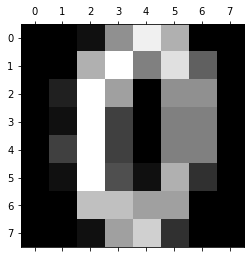

In [5]:
sns.reset_orig();

plt.gray()
plt.matshow(digits.images[10])
plt.show();

#### Write your code below

In [6]:
def perceptron(X_train, Y_train, epochs, eta):
  weights = np.zeros((X_train.shape[1], 1))
  error = 1
  epoch = 0
  while(epoch < epochs and error != 0):
    error = 0
    y_hat = 0
    for xi, yi in zip(X_train, Y_train):
      if np.dot(weights.T, xi)[0] >= 0: 
        y_hat = 1
      else: 
        y_hat = -1

      if yi*y_hat < 0:
        weights = (weights.T + yi*xi).T
        error += 1

    epoch += 1
  return weights, error


def predictClass(X_fit, Y_fit, weights):
  pc = np.zeros(X_fit.shape[0])

  for i in range(0, X_fit.shape[0]):
    for j in range(0, Y_fit.shape[1]):
      predict = np.dot(weights[:,j], X_fit[i,:])

      if predict > 0:
        pc[i] = j
        break
        
  return pc

In [15]:
weights = np.zeros((X_train.shape[1], Y_train.shape[1]))

for ob in range(Y_train.shape[1]):
  w, error = perceptron(X_train, Y_train[:,ob], 100, 0.05)
  weights[:,ob] = w[:,0]


e_train = 0
e_val = 0
e_test = 0

pc = predictClass(X_val, Y_val, weights)
nsample_val = Y_val.shape[0]

for i in range(0, nsample_val):
  y_act = Y_val[i,:]

  if y_act[int(pc[i])] != 1.0:
    e_val += 1


weights = np.zeros((X_train.shape[1], Y_train.shape[1]))

for ob in range(Y_train.shape[1]):
  w, error = perceptron(X_train, Y_train[:,ob], 100, 0.05)
  weights[:,ob] = w[:,0]

pc = predictClass(X_train, Y_train, weights)
nsample_t = Y_train.shape[0]

for i in range(0, nsample_t):
  y_act = Y_train[i,:]

  if y_act[int(pc[i])] != 1.0:
    e_train += 1


weights = np.zeros((X_test.shape[1], Y_test.shape[1]))

for ob in range(Y_test.shape[1]):
  w, error = perceptron(X_test, Y_test[:,ob], 100, 0.05)
  weights[:,ob] = w[:,0]

pc = predictClass(X_test, Y_test, weights)
nsample_test = Y_test.shape[0]

for i in range(0, nsample_test):
  y_act = Y_test[i,:]

  if y_act[int(pc[i])] != 1.0:
    e_test += 1


In [16]:
print("Validation Accuracy: ", (1-e_val/nsample_val)*100)
print("Training Accuracy: ", (1-e_train/nsample_t)*100)
print("Test Accuracy: ", (1-e_test/nsample_test)*100)

Validation Accuracy:  91.11111111111111
Training Accuracy:  92.76054097056483
Test Accuracy:  97.77777777777777
